!python --version
!jupyter --version


In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import os
HOME = os.getcwd()
print(HOME)

d:\YOLOV8


In [3]:
# Pip install method (recommended)

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.8.20 torch-2.4.1 CUDA:0 (NVIDIA RTX 6000 Ada Generation, 49140MiB)
Setup complete  (24 CPUs, 63.8 GB RAM, 67.6/111.6 GB disk)


In [4]:
from ultralytics import RTDETR

from IPython.display import display, Image

In [ ]:

# from roboflow import Roboflow
# rf = Roboflow(api_key="SmutrcE1hpSEpSDb2Hbk")
# project = rf.workspace("mangrove-i43zl").project("3class-7zahe")
# version = project.version(1)
# dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [5]:
import torch
torch.cuda.empty_cache()

In [15]:
!yolo task=detect mode=train model=rtdetr-l.pt data="D:\YOLOV8\@25M(3class)-1\data.yaml" epochs=200 imgsz=640 plots=True patience=0 project=fixrtdetr3class_epoch200_lr00001 device=0 lr0= 0.0001 lrf=0.0001
# !yolo task=detect mode=train model=rtdetr-l.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True patience=0 project=RTDETR_EPOCH200_3class device=0

C:\Users\Dell\anaconda3\envs\yoloseries\lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cp

In [42]:
%cd .

d:\


D:\YOLOV8\yolomv2\train10


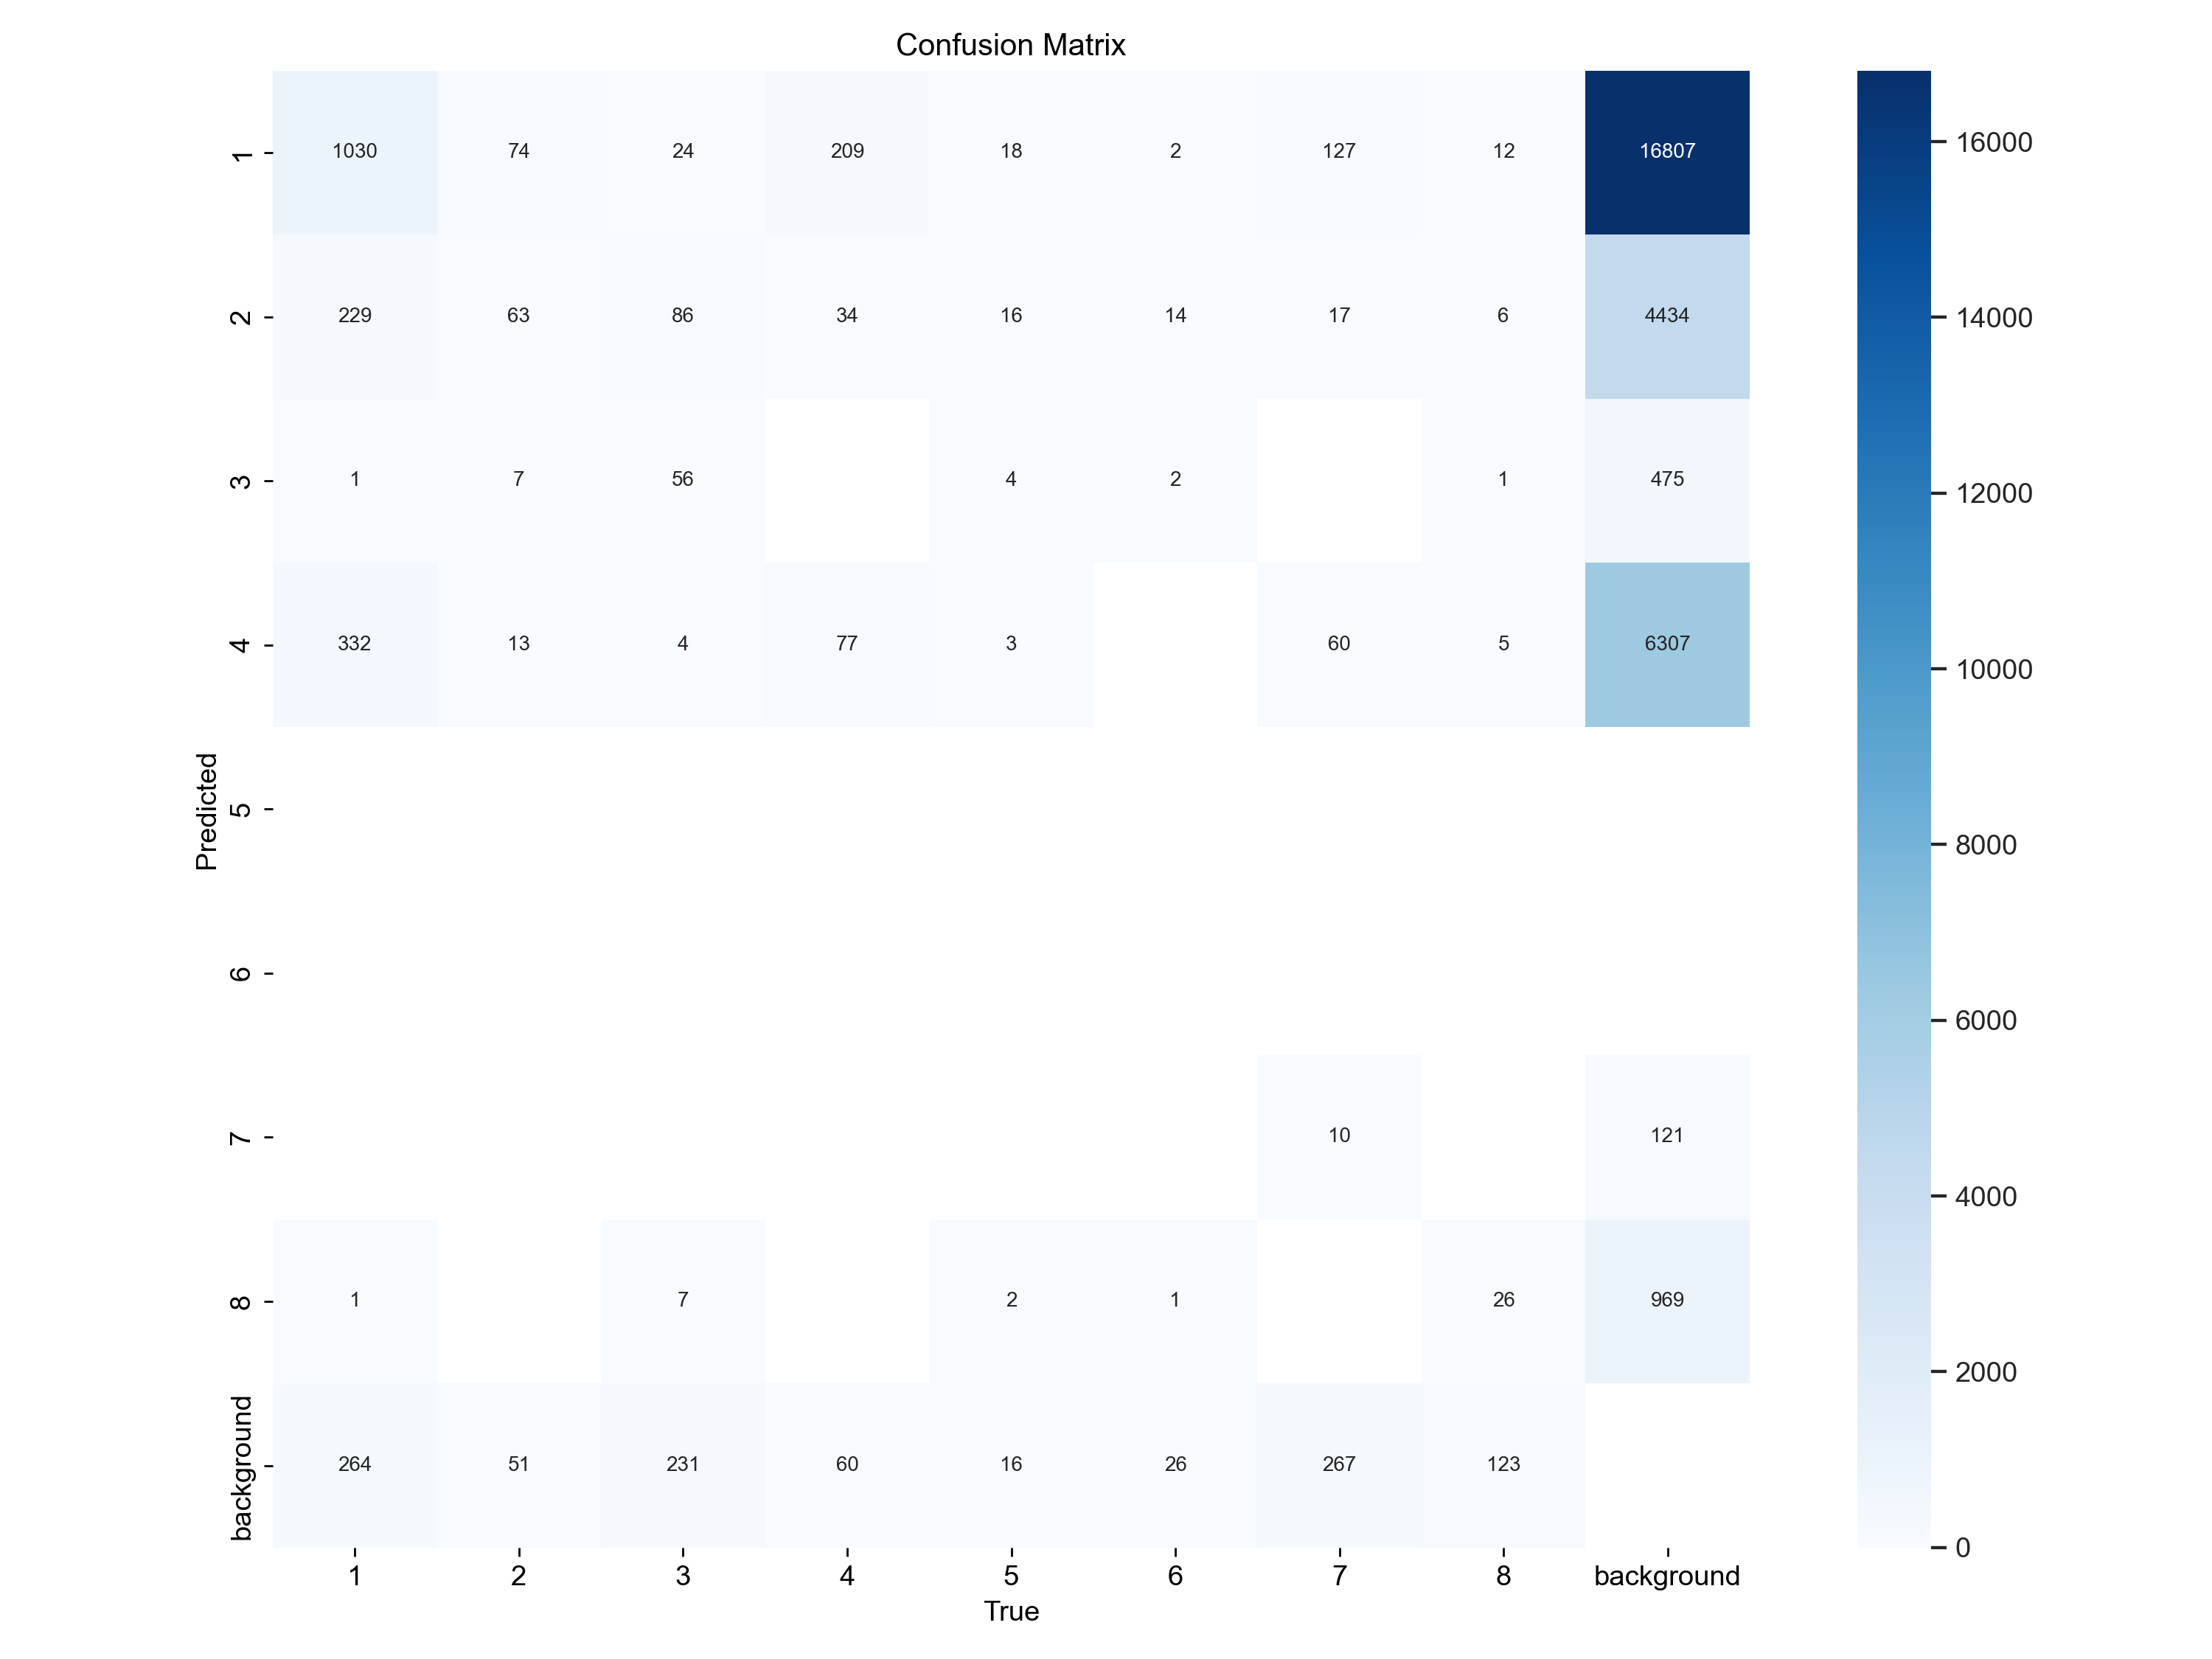

In [13]:
Image(filename=f'D:\\YOLOV8\\yolomv2\\train10\\confusion_matrix.png', width=600)

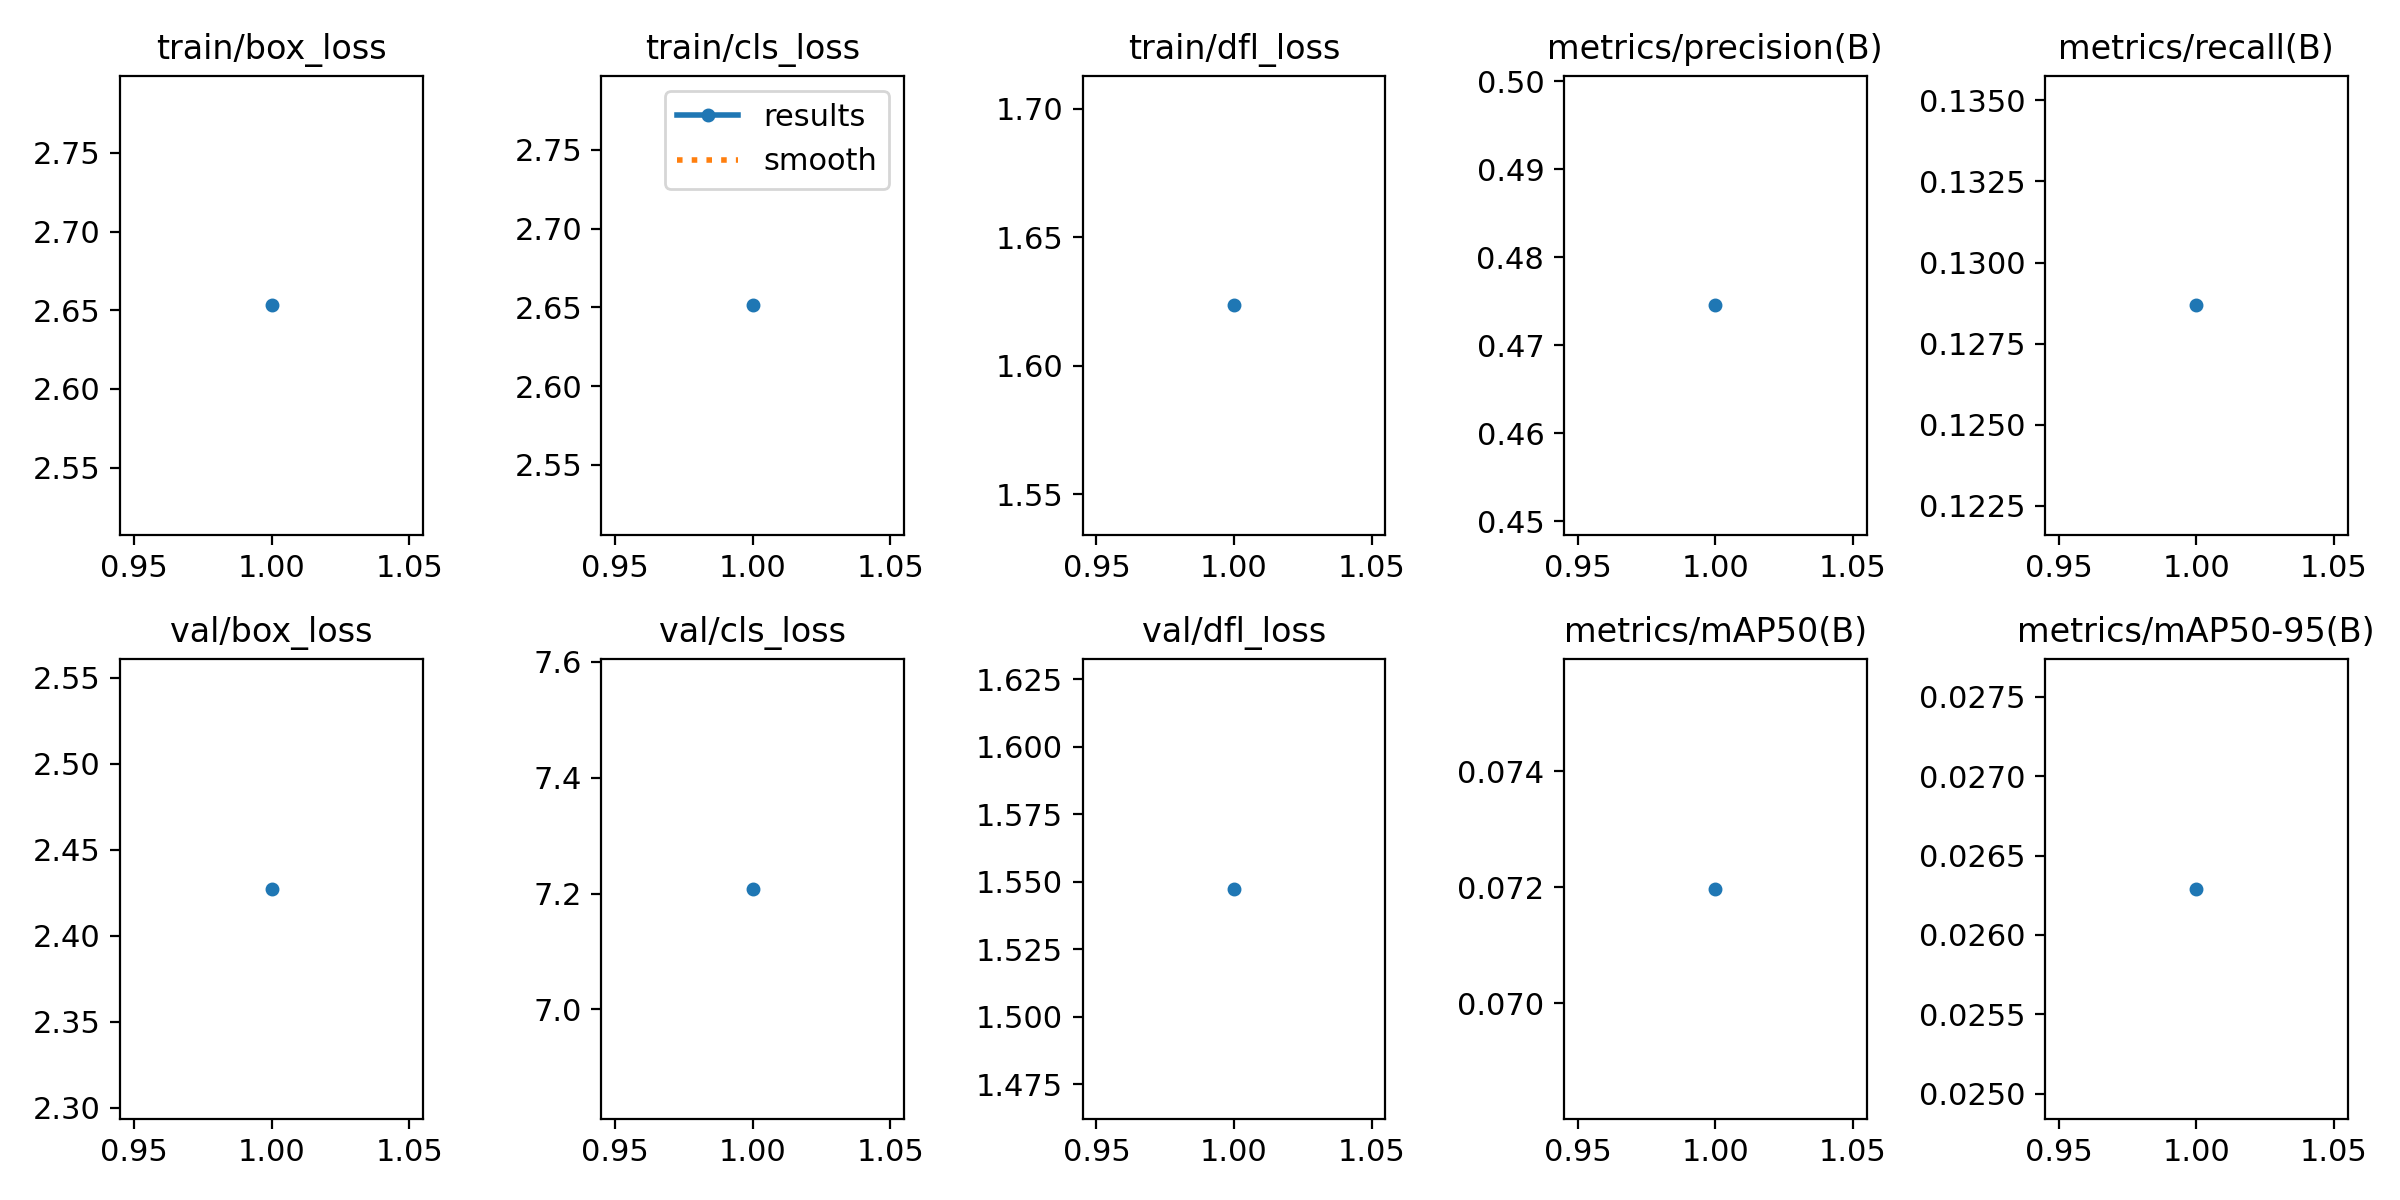

In [14]:
Image(filename=f'D:\\YOLOV8\\yolomv2\\train10\\results.png', width=600)

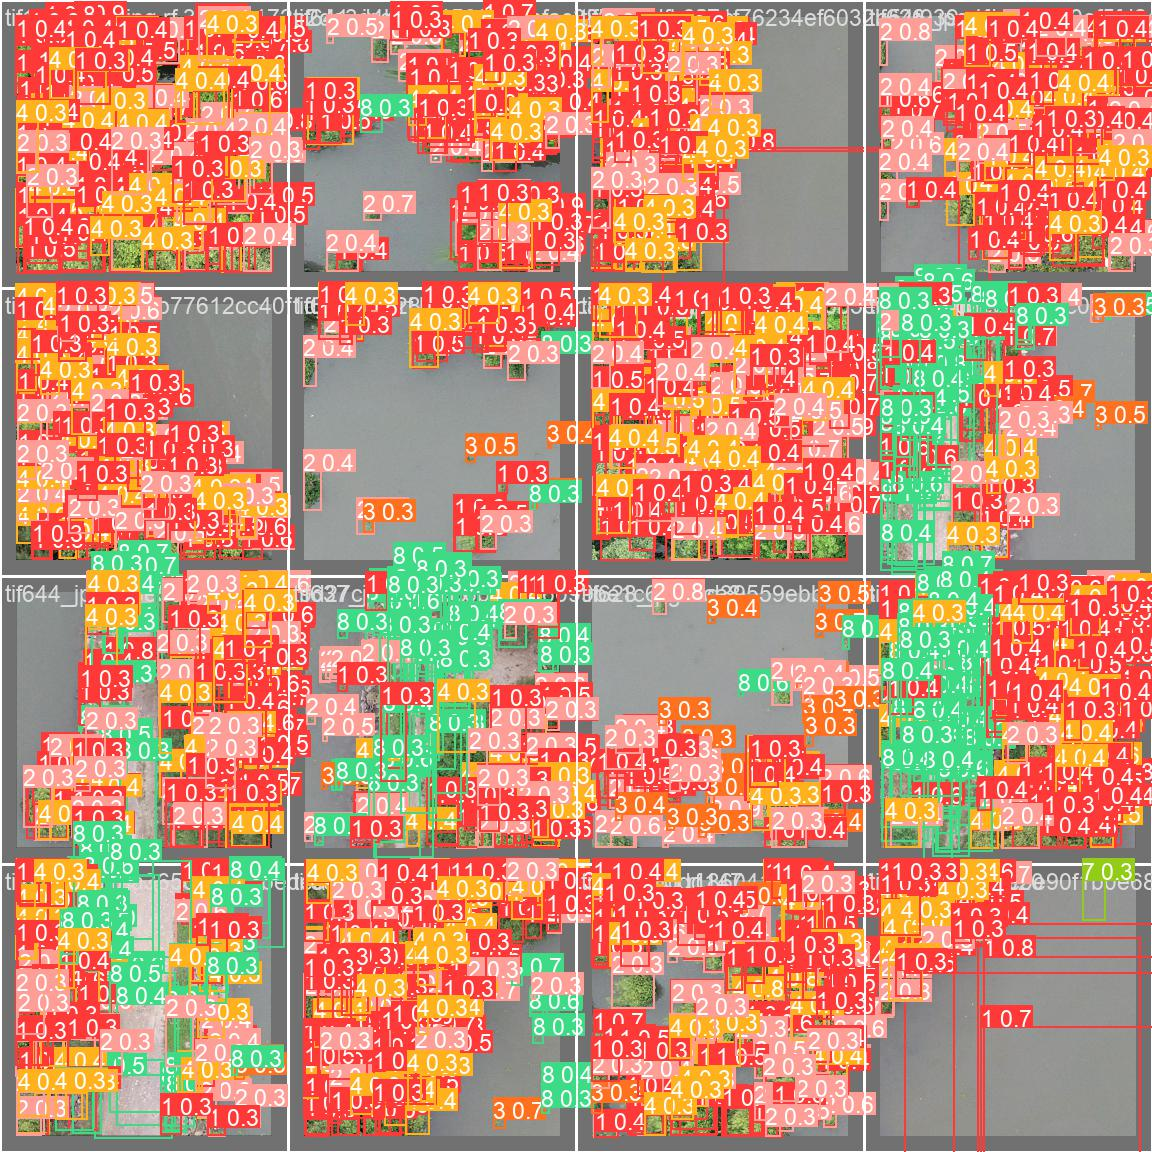

In [15]:
#%cd {HOME}
Image(filename=f'D:\\YOLOV8\\yolomv2\\train10\\val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=detect mode=val model="D:\YOLOV8\fixrtdetr3class_epoch200_lr00001\train\weights\best.pt" data="D:\YOLOV8\@25M(3class)-1\data.yaml" project=fixrtdetr3class_epoch200_lr00001

d:\YOLOV8


C:\Users\Dell\anaconda3\envs\yoloseries\lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cp

## Inference with Custom Model

In [17]:

!yolo task=detect mode=predict model="D:\YOLOV8\fixrtdetr3class_epoch200_lr00001\train\weights\best.pt" conf=0.25 source="D:\YOLOV8\@25M(3class)-1\test\images" save=True project=fixrtdetr3class_epoch200_lr00001



C:\Users\Dell\anaconda3\envs\yoloseries\lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cp

**NOTE:** Let's take a look at few results.

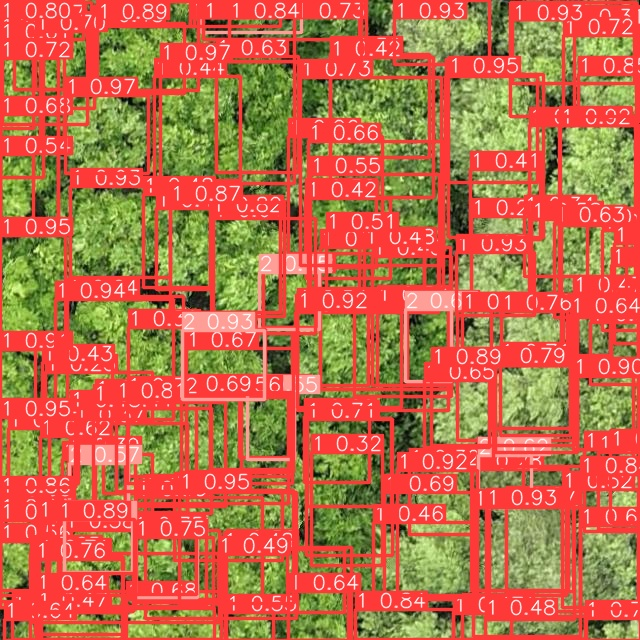

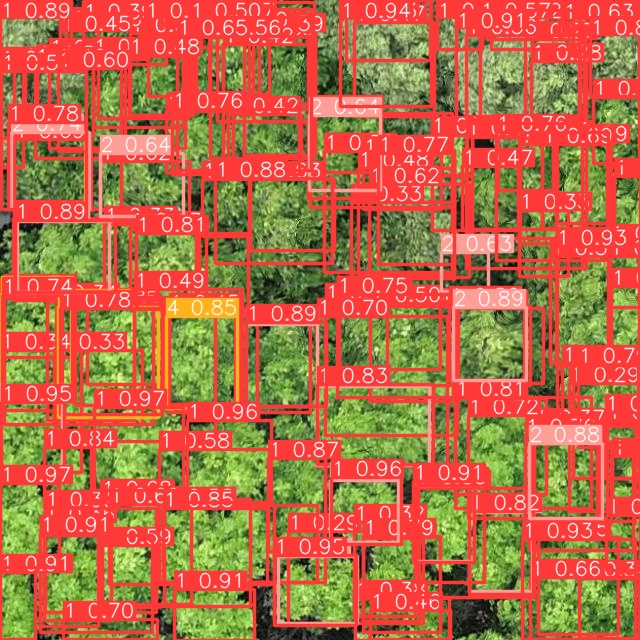

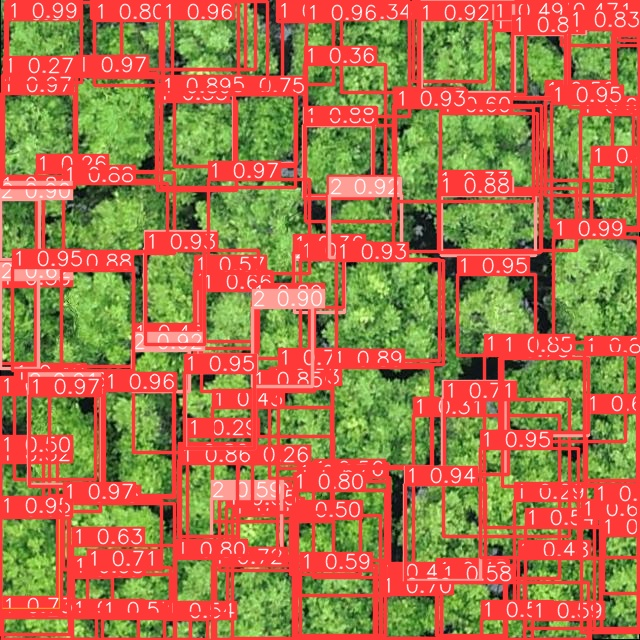

In [21]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = './runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [22]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on tif278_jpg.rf.1c6ca25bf88b91b6a619088461fd9d8a.jpg


{'predictions': [{'x': 312.5,
   'y': 328.5,
   'width': 131.0,
   'height': 117.0,
   'confidence': 0.5978771448135376,
   'class': '1',
   'class_id': 0,
   'detection_id': 'd45ce750-9f66-4503-b93e-c31ce36643e0',
   'image_path': 'd:\\YOLOV8\\datasetbaru-9/test/images/tif278_jpg.rf.1c6ca25bf88b91b6a619088461fd9d8a.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 35.0,
   'y': 139.5,
   'width': 68.0,
   'height': 75.0,
   'confidence': 0.572167158126831,
   'class': '1',
   'class_id': 0,
   'detection_id': '842c95af-5033-4021-8ee2-7c26825d35d0',
   'image_path': 'd:\\YOLOV8\\datasetbaru-9/test/images/tif278_jpg.rf.1c6ca25bf88b91b6a619088461fd9d8a.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 158.0,
   'y': 369.5,
   'width': 142.0,
   'height': 133.0,
   'confidence': 0.44542133808135986,
   'class': '1',
   'class_id': 0,
   'detection_id': '629874d2-217b-45a7-9fbc-cc6a7350d441',
   'image_path': 'd:\\YOLOV8\\datasetbaru-9/test/images/tif278_jpg.rf.1c6ca2